In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

#Importing the dataset
dataset = pd.read_excel("Speed_Dating_Data_xl.xlsx")

# First look
print(dataset.info())
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB
None
(8378, 195)


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(175), int64(12), object(8)
memory usage: 12.5+ MB


In [8]:
print(dataset.columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)


""""
APPROCHE GENERALE

1. Feature engineering 1
Construction d'une variable cible "% de transformation" à partir de la variable 'Match'
Utilité : cette variable sera le reflet de la 'performance'

2. Exploration des autres variables au regard du % de transformation
Possibilité de comparer la performance de groupes différents 

3. Feature engineering 2
Construction d'une variable pour identifier les profils Top matcheur et les low matcheur
Utilité : identifier les variables qui accentuent le plus les différences entre les 2 profils

4. tester si les variables identifiées dans la partie 3 sont les plus prédicteurs d'un match

""""

In [7]:
# 1. Feature engineering 1 : % de transformation

# calculer le total de match par personne : colonne match
# on met le résutat dans un nouveau dataframe
# classer du top au low

dataset_match = dataset

total_match = dataset_match.groupby('iid').sum()
total_match = total_match.sort_values(by = 'match', ascending = False)

total_match['match']

iid
524    14
107    11
208    11
268    10
366    10
       ..
457     0
247     0
455     0
454     0
286     0
Name: match, Length: 551, dtype: int64

In [8]:
# calculer le total de match par personne : colonne match
# classer du top au low

dataset_match = dataset

total_match = dataset_match.groupby('iid').sum()
total_match = total_match.sort_values(by = 'match', ascending = False)
display(total_match['match'])
display(total_match.shape)

iid
524    14
107    11
208    11
268    10
366    10
       ..
457     0
247     0
455     0
454     0
286     0
Name: match, Length: 551, dtype: int64

(551, 186)

In [9]:
# calculer le total de personnes recontrées :  colonne round 
# Utilité : permet de relativiser le total match d'une personne : 10 matchs sur 10 personnes vues =/= 10 matchs sur 22 personnes vues
# Attention : on utilise la moyenne car c'est le même nombre qui se répète pour chaque personne

dataset_personnes_vues = dataset

total_personnes_vues = dataset_personnes_vues.groupby('iid').mean()
total_personnes_vues = total_personnes_vues.sort_values(by = 'round', ascending = False)
display(total_personnes_vues['round'])


iid
552    22.0
530    22.0
528    22.0
527    22.0
526    22.0
       ... 
138     5.0
139     5.0
140     5.0
141     5.0
135     5.0
Name: round, Length: 551, dtype: float64

In [10]:
# Calculer un % de transformation 'transfo' : transfo = nb de match total / nb de personnes totales vues
# il faut fusionner les deux dataset
# attention : les 2 colonnes des deux data set on été fusionné donc dans le dataset global, le nom des colonnes ont été modifié

newdataset = total_match.merge(total_personnes_vues,on='iid')
newdataset['transfo'] = newdataset['match_x'] / newdataset['round_y'] * 100
display(newdataset['transfo'])
newdataset['transfo'].describe()

iid
524    63.636364
107    61.111111
208    55.000000
268    47.619048
366    50.000000
         ...    
457     0.000000
247     0.000000
455     0.000000
454     0.000000
286     0.000000
Name: transfo, Length: 551, dtype: float64

count    551.000000
mean      16.853167
std       14.937671
min        0.000000
25%        5.555556
50%       13.636364
75%       23.809524
max       90.000000
Name: transfo, dtype: float64

In [11]:
# VISUALISATION 1
# afficher le taux de transformation par métier

transfo_par_metier = newdataset.pivot_table(index='career_c_y', values='transfo', aggfunc='mean')
transfo_par_metier.sort_values(by = 'transfo', ascending = False)

,transfo
career_c_y,
14.0,30.000000
3.0,23.217664
1.0,20.481648
11.0,19.263296
7.0,18.398630
16.0,18.181818
5.0,17.480159
6.0,16.033028
4.0,15.773802


In [ ]:
"""
career_c: career coded 
1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture
""""

/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; yo

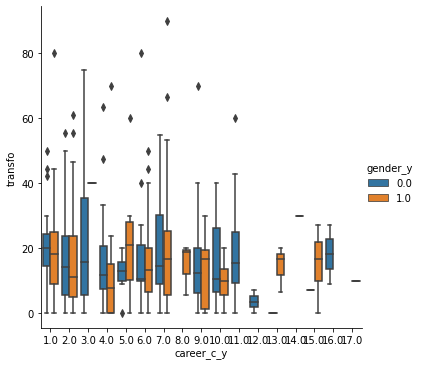

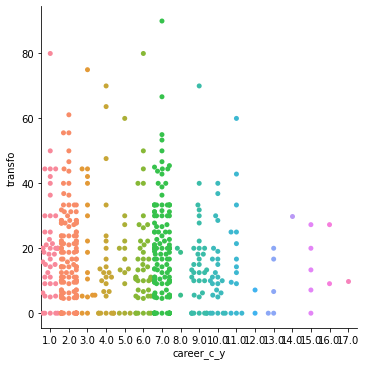

In [12]:
sns.catplot(x="career_c_y", y="transfo", kind="box", hue = 'gender_y', data=newdataset)
sns.catplot(x='career_c_y', y='transfo', kind="swarm", data=newdataset)

In [13]:
newdataset['attr_o_y'].describe()

count    551.000000
mean       6.202797
std        1.185011
min        2.333333
25%        5.400000
50%        6.277778
75%        7.105556
max        8.687500
Name: attr_o_y, dtype: float64

In [44]:
# VISUALISATION 2
# Lien entre note d'attractivité générale et le taux de transformation

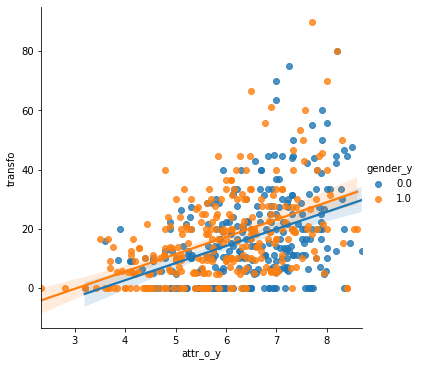

In [14]:
#sns.relplot(x = 'attr_o_y' , y = 'transfo' , data = newdataset, hue = 'gender_y')
sns.lmplot(x='attr_o_y', y='transfo', data=newdataset, hue = 'gender_y')

In [ ]:
# VISUALISATION 3
# Lien entre la corrélation des centres d'interets et le taux de transformation

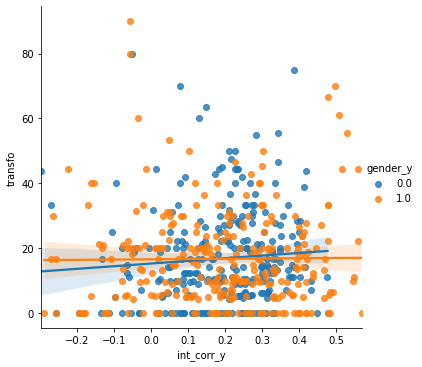

In [15]:
#sns.relplot(x = 'int_corr_y' , y = 'transfo' , data = newdataset, hue = 'gender_y')
sns.lmplot(x='int_corr_y', y='transfo', data=newdataset, hue = 'gender_y')

In [ ]:
# VISUALISATION 4
# Lien entre le fait d'avoir match et samerace

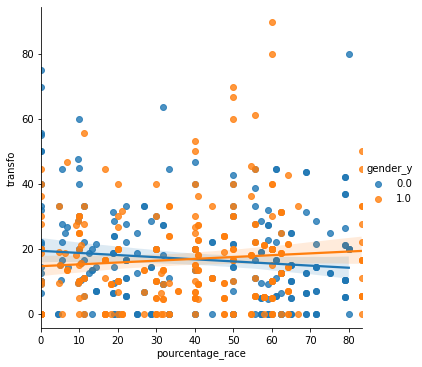

In [112]:
# calcul du % de samerace par personne
newdataset['pourcentage_race'] = newdataset['samerace_x'] / newdataset['round_y'] * 100


sns.lmplot(x='pourcentage_race', y='transfo', data=newdataset, hue = 'gender_y')


In [113]:
# Quelles variables corrèlent le plus avec le taux de transformation

In [ ]:
corr = newdataset.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax)

In [31]:
# saving the excel 
newdataset.to_excel('Newdataset.xlsx') 

# saving the excel 
newdataset.to_csv('Newdataset.csv') 


ModuleNotFoundError: No module named 'openpyxl'